<a href="https://colab.research.google.com/github/akriti0998/The-Sparks-Foundation-task/blob/main/Task__1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import math

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_st=pd.read_csv('/content/drive/MyDrive/student.csv')

In [ ]:
data_st.shape

(25, 2)

In [ ]:
len(data_st)

25

In [ ]:
data_st.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data_st.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data_st.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data_st['Hours']

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [ ]:
data_st['Scores']

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

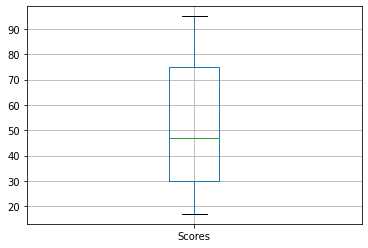

In [ ]:
data_st.boxplot('Scores')

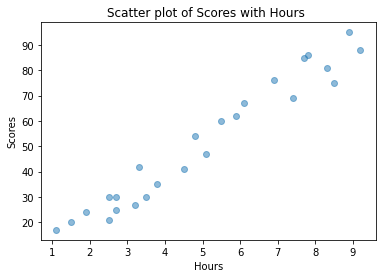

In [ ]:
plt.scatter(data_st['Hours'],data_st['Scores'],alpha=0.5)
plt.title('Scatter plot of Scores with Hours ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

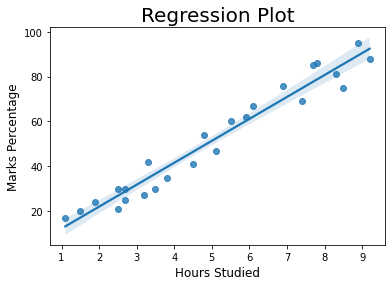

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x= data_st['Hours'], y= data_st['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data_st.corr())

In [ ]:
dependent_variable="Scores"

In [ ]:
independent_variable="Hours"

In [ ]:
X = data_st[independent_variable].values
X


array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [ ]:
y = data_st[dependent_variable].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 0)

In [ ]:
# 1. Splittiing the data
X = data_st.iloc[:, :-1].values  
y = data_st.iloc[:, 1].values


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)
print("Model is Trained")

Model is Trained


In [ ]:
regression.intercept_

12.868050426588574

In [ ]:
regression.coef_

array([80.52759455])

In [ ]:
X_test

array([[0.04938272],
       [0.25925926],
       [0.77777778],
       [0.17283951],
       [0.59259259],
       [0.33333333],
       [0.09876543]])

In [ ]:
# Predicting the Test set results
y_pred = regression.predict(X_test)
prediction = pd.DataFrame({'Hours':  [i[0] for i in X_test], 'Predicted Marks':[k for k in y_pred]})
prediction

,Hours,Predicted Marks
0,0.049383,16.844722
1,0.259259,33.745575
2,0.777778,75.500624
3,0.172840,26.786400
4,0.592593,60.588106
5,0.333333,39.710582
6,0.098765,20.821393
